In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
tickerSymbol="AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-5-13')
tickerDf=tickerDf.reset_index()
#print(tickerDf)
tickerDf=tickerDf.drop(['Date'],axis=1)
#tickerDf=tickerDf.drop(['Close'],axis=1)
print(tickerDf.head())

       Open      High       Low     Close     Volume  Dividends  Stock Splits
0  6.478688  6.511168  6.446815  6.496294  493729600        0.0           0.0
1  6.514206  6.544257  6.473226  6.507527  601904800        0.0           0.0
2  6.507526  6.533328  6.397337  6.404015  552160000        0.0           0.0
3  6.427692  6.435281  6.345733  6.392176  477131200        0.0           0.0
4  6.383677  6.435281  6.346038  6.434674  447610800        0.0           0.0


In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


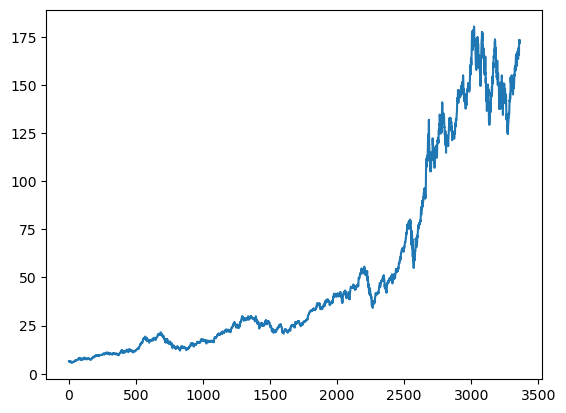

In [3]:
plt.plot(tickerDf.Close)

In [4]:
mavg100=tickerDf.Close.rolling(100).mean()

In [5]:
mavg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3358    150.128168
3359    150.393019
3360    150.698280
3361    151.072344
3362    151.456850
Name: Close, Length: 3363, dtype: float64

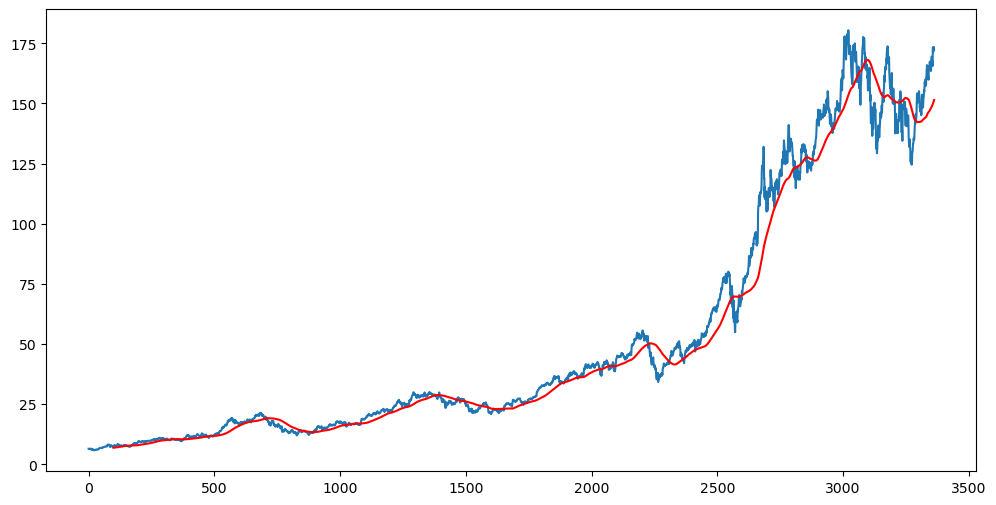

In [6]:
plt.figure(figsize=(12,6))
plt.plot(tickerDf.Close)
plt.plot(mavg100,'r')

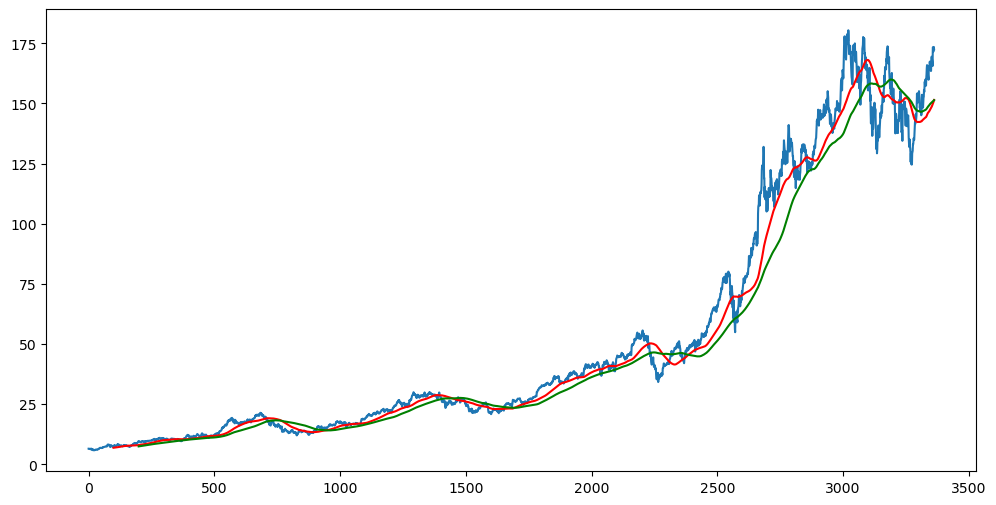

In [7]:
mavg200=tickerDf.Close.rolling(200).mean()
mavg200
plt.figure(figsize=(12,6))
plt.plot(tickerDf.Close)
plt.plot(mavg100,'r')
plt.plot(mavg200,'g')

In [47]:
#spliting data into training and testing
data_train =pd.DataFrame(tickerDf['Close'][0:int(len(tickerDf)*0.7)])
data_test= pd.DataFrame(tickerDf['Close'][int(len(tickerDf)*0.7):int(len(tickerDf))])

#print(tickerDf.shape)
#print(data_train.shape)
#print(data_test.shape)

In [48]:
data_train.head()

,Close
0,6.496294
1,6.507527
2,6.404015
3,6.392176
4,6.434674


In [49]:
data_test.head()

,Close
2354,45.047436
2355,45.760540
2356,46.308720
2357,46.104973
2358,45.843018


In [11]:
#for lstm model we need to scale the data ,at present data is not supported for futher processing 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#scaling data as per lstm format
data_train_array= scaler.fit_transform(data_train)
data_train_array

array([[0.01338262],
       [0.01360814],
       [0.01153002],
       ...,
       [0.86720501],
       [0.85663007],
       [0.84314157]])

In [12]:
#divide train data array into x train and y train
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])

#converting into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
x_train.shape

(2254, 100, 1)

In [14]:
y_train.shape

(2254,)

In [15]:
#intialsing ML model

In [16]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow

In [18]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [19]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
71/71 [==============================] - 17s 175ms/step - loss: 0.0295
Epoch 2/50
71/71 [==============================] - 13s 185ms/step - loss: 0.0066
Epoch 3/50
71/71 [==============================] - 13s 184ms/step - loss: 0.0062
Epoch 4/50
71/71 [==============================] - 13s 185ms/step - loss: 0.0050
Epoch 5/50
71/71 [==============================] - 13s 187ms/step - loss: 0.0051
Epoch 6/50
71/71 [==============================] - 13s 188ms/step - loss: 0.0041
Epoch 7/50
71/71 [==============================] - 13s 188ms/step - loss: 0.0044
Epoch 8/50
71/71 [==============================] - 13s 189ms/step - loss: 0.0039
Epoch 9/50
71/71 [==============================] - 14s 195ms/step - loss: 0.0036
Epoch 10/50
71/71 [==============================] - 14s 203ms/step - loss: 0.0033
Epoch 11/50
71/71 [==============================] - 14s 196ms/step - loss: 0.0040
Epoch 12/50
71/71 [==============================] - 14s 192ms/step - loss: 0.0035
Epoch 13/50
7

In [22]:
model.save('keras_model.h5')

In [50]:
data_test

,Close
2354,45.047436
2355,45.760540
2356,46.308720
2357,46.104973
2358,45.843018
...,...
3358,173.260345
3359,171.532745
3360,173.320267
3361,173.510010


In [51]:
#tail is used for displaying last values
data_train.tail(100)

,Close
2254,39.442867
2255,39.955330
2256,38.709057
2257,37.732243
2258,36.264626
...,...
2349,50.374004
2350,49.016083
2351,49.025745
2352,48.499001


In [52]:
#data_test=data_test.drop(['level_0'],axis=1)
#data_test=np.array(data_test)
data_test

,Close
2354,45.047436
2355,45.760540
2356,46.308720
2357,46.104973
2358,45.843018
...,...
3358,173.260345
3359,171.532745
3360,173.320267
3361,173.510010


In [59]:
past_100_days=data_train.tail(100)
#past_100_days
final_df=pd.concat([past_100_days,data_test])
final_df

,Close
2254,39.442867
2255,39.955330
2256,38.709057
2257,37.732243
2258,36.264626
...,...
3358,173.260345
3359,171.532745
3360,173.320267
3361,173.510010


In [60]:
#final_df.drop(['index','level_0'],axis=1)
final_df.head()

,Close
2254,39.442867
2255,39.955330
2256,38.709057
2257,37.732243
2258,36.264626


In [61]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.03578686],
       [0.03929149],
       [0.03076847],
       ...,
       [0.95134853],
       [0.95264615],
       [0.94621765]])

In [63]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [64]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

(1009, 100, 1) (1009,)


In [65]:
y_predicted=model.predict(x_test)
y_predicted=np.array(y_predicted)

32/32 [==============================] - 5s 89ms/step


In [66]:
scaler.scale_

array([0.00683881])

In [67]:
scalerfactor=(1/0.006838811)

In [68]:
y_predicted

array([[0.14695695],
       [0.14713287],
       [0.14695145],
       ...,
       [0.8699287 ],
       [0.87447906],
       [0.8794602 ]], dtype=float32)

In [69]:
y_test

array([0.07411542, 0.0789922 , 0.0827411 , ..., 0.95134853, 0.95264615,
       0.94621765])

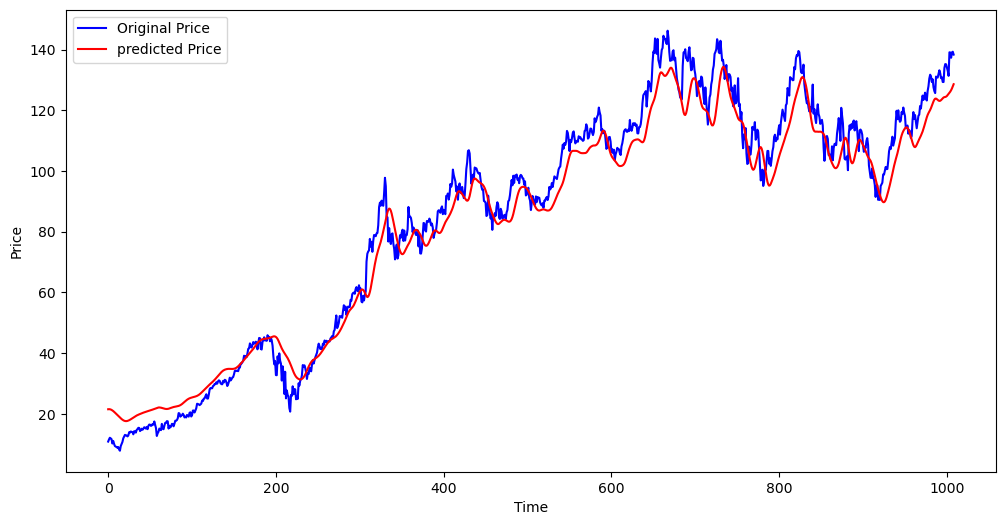

In [70]:
plt.figure(figsize=(12,6))
plt.plot(y_test*scalerfactor,'b',label='Original Price')
plt.plot(y_predicted*scalerfactor,'r',label='predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()